In [1]:
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np

In [2]:
nyt_county_df = pd.read_csv('./query_result/nytimes_data_in_usa_us_county_results.csv')
nyt_county_df.head()

,date,county,state,fips,cases,deaths
0,2021-12-30,Catahoula,Louisiana,22025.0,1879,48.0
1,2021-12-30,Claiborne,Louisiana,22027.0,2138,66.0
2,2021-12-30,Concordia,Louisiana,22029.0,3402,80.0
3,2021-12-30,De Soto,Louisiana,22031.0,5107,115.0
4,2021-12-30,East Baton Rouge,Louisiana,22033.0,70112,1180.0


In [3]:
import matplotlib.pyplot as plt

In [4]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [5]:
nyt_county_df['date'] = pd.to_datetime(nyt_county_df['date'])

# Separate cases and deaths data
cases_df = nyt_county_df[['date', 'cases']].groupby('date').sum().reset_index()
deaths_df = nyt_county_df[['date', 'deaths']].groupby('date').sum().reset_index()

In [6]:

# Fit SARIMAX models for cases and deaths separately
cases_model = SARIMAX(cases_df['cases'], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0)).fit()
deaths_model = SARIMAX(deaths_df['deaths'], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0)).fit()

# Forecast future cases and deaths
cases_forecast = cases_model.forecast(steps=90)
deaths_forecast = deaths_model.forecast(steps=90)


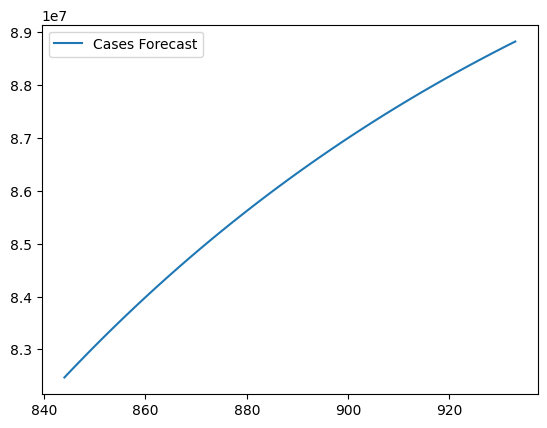

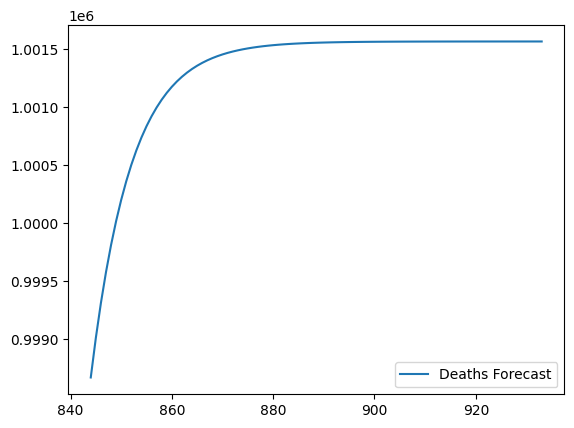

In [7]:
# Plot the forecasts for cases
plt.plot(cases_forecast, label='Cases Forecast')
plt.legend()
plt.show()

# Plot the forecasts for deaths
plt.plot(deaths_forecast, label='Deaths Forecast')
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error


In [10]:
# Calculate and print accuracy metrics
cases_actual = cases_df['cases'][-90:]
deaths_actual = deaths_df['deaths'][-90:]
cases_mse = mean_squared_error(cases_actual, cases_forecast)
deaths_mse = mean_squared_error(deaths_actual, deaths_forecast)
cases_rmse = round(cases_mse**0.5, 2)
deaths_rmse = round(deaths_mse**0.5, 2)
print(f"Cases RMSE: {cases_rmse}")
print(f"Deaths RMSE: {deaths_rmse}")

Cases RMSE: 6093421.96
Deaths RMSE: 35747.14


In [11]:
print(f"Cases MSE: {cases_mse}")
print(f"Deaths MSE: {deaths_mse}")

Cases MSE: 37129791164043.43
Deaths MSE: 1277858329.04265


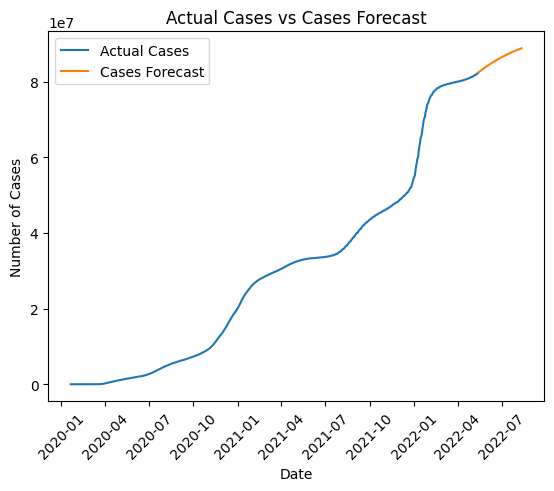

In [12]:
# Plot actual cases
plt.plot(cases_df['date'], cases_df['cases'], label='Actual Cases')

# Plot forecasted cases
forecast_dates = pd.date_range(start=cases_df['date'].iloc[-1], periods=len(cases_forecast)+1, freq='D')[1:]
plt.plot(forecast_dates, cases_forecast, label='Cases Forecast')

# Set plot title and labels
plt.title('Actual Cases vs Cases Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.xticks(rotation=45)
# Display plot
plt.show()

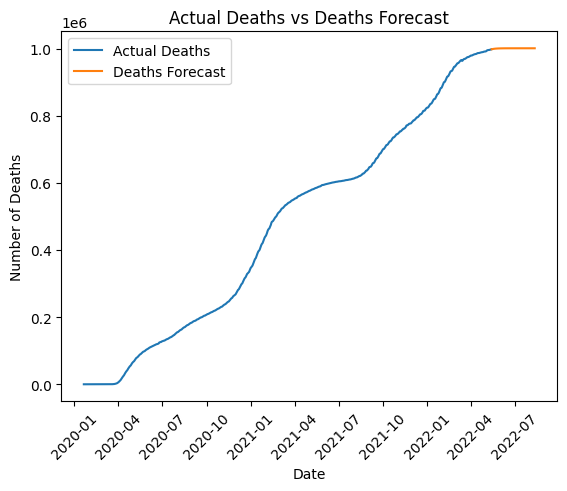

In [13]:
# Plot actual cases
plt.plot(deaths_df['date'], deaths_df['deaths'], label='Actual Deaths')

# Plot forecasted cases
forecast_dates = pd.date_range(start=deaths_df['date'].iloc[-1], periods=len(deaths_forecast)+1, freq='D')[1:]
plt.plot(forecast_dates, deaths_forecast, label='Deaths Forecast')

# Set plot title and labels
plt.title('Actual Deaths vs Deaths Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.legend()
plt.xticks(rotation=45)
# Display plot
plt.show()